# The Exponential Ornstein Uhlenbeck Process


The exponential Ornstein Uhlenbeck process is a multivariate process with components $Y_i(t)$ that are defined by

$$
Y_i(t)=A_i\exp(B_i X_i(t))
$$

where $X_i(t)$ are components of a multivariate Ornstein Uhlenbeck process, each governed by

$$d X_i=-\theta X_i dt+\sigma_i dW_i$$

The parameters $\theta$ and $\sigma$ are the force strength and the noise magnitude, respectively.



In [1]:
## This is just for colors of the plots
from palettable.wesanderson import GrandBudapest3_6
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=GrandBudapest3_6.mpl_colors)
## --------

import matplotlib.pyplot as plt
import numpy as np
import stopro as p

## Simple eOUP


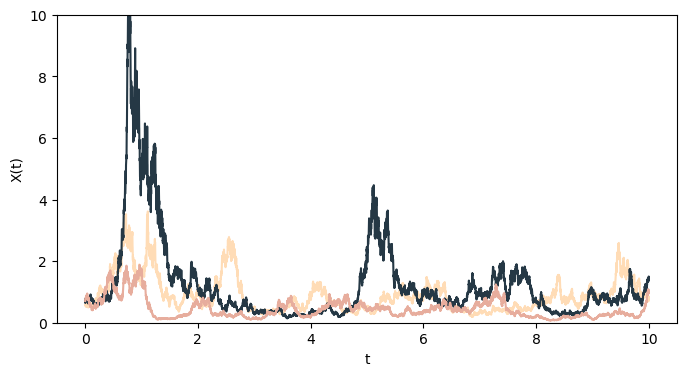

In [2]:
T = 10
dt = 0.001
samples = 3
res = p.exponential_ornstein_uhlenbeck(T,dt, samples = samples)

fig,ax = plt.subplots(figsize=[8,4])
for i in range(len(res["X"])):
    ax.plot(res["t"],np.squeeze(res["X"][i]))
    
plt.xlabel("t")
plt.ylabel("X(t)")
plt.ylim([0,10])
plt.show()

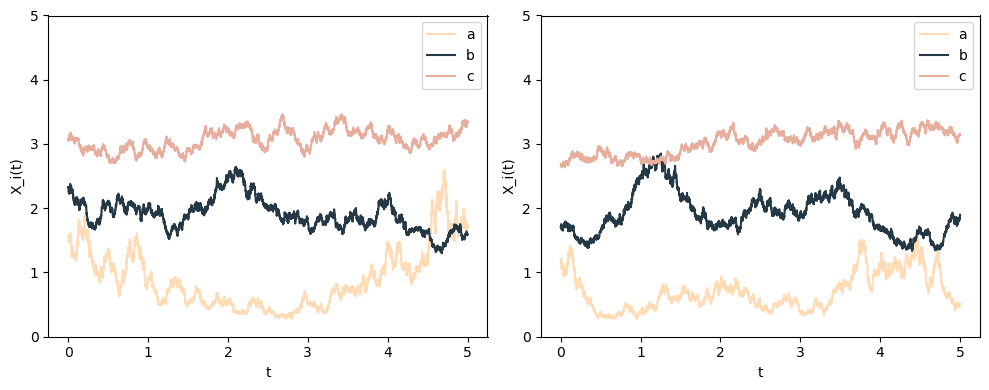

In [4]:

T = 5
dt = 0.001
samples = 2
gap = 10
N = 3
mean = np.array([1,2,3])
cv =  0.2*np.array([3,1,0.5])

res = p.exponential_ornstein_uhlenbeck(T,dt,mean=mean, coeff_var=cv, 
                          samples=samples,initial_condition='stationary')


t = res["t"]
D, steps = np.shape(res["X"][0])
fig, ax = plt.subplots(1,samples,figsize=[10,4])
for j in range(samples):
    X = res["X"][j]
    for i in range(D):
        ax[j].plot(t,X[i])
        ax[j].set_xlabel("t")
        ax[j].set_ylabel("X_i(t)")
        ax[j].set_ylim([0,5])
        ax[j].legend(["a","b","c","d"])
plt.tight_layout()
plt.show()

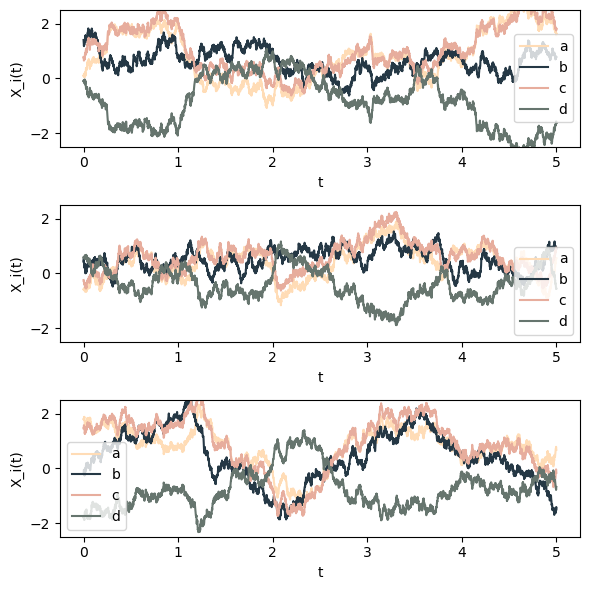

In [5]:
T = 5
dt = 0.001
samples = 3

A = np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/2,np.pi/6,np.pi]]);

res = p.ornstein_uhlenbeck(T,dt,mixing_matrix=A,samples=samples,initial_condition='stationary')

t = res["t"]
D, steps = np.shape(res["X"][0])
fig, ax = plt.subplots(samples,1,figsize=[6,6])
for j in range(samples):
    X = res["X"][j]
    for i in range(D):
        ax[j].plot(t,X[i])
        ax[j].set_xlabel("t")
        ax[j].set_ylabel("X_i(t)")
        ax[j].set_ylim([-2.5,2.5])
        ax[j].legend(["a","b","c","d"])
plt.tight_layout()
plt.show()

You can see that realizations **a** and **d** are exactly anticorrelated and **a** and **c** are strongly (positively) correlated